In [29]:
import json
from pprint import pprint
import os

feature_vector_file_name = "_double_cnt_log_move_fv.json"
file_path = f"{os.getcwd()}/data/{feature_vector_file_name}"

with open(file_path) as f:
  data = json.load(f)

pprint(data[:5])

[[9, 1.792], [256, 3.638], [49, 3.045], [121, 3.584], [36, 2.833]]


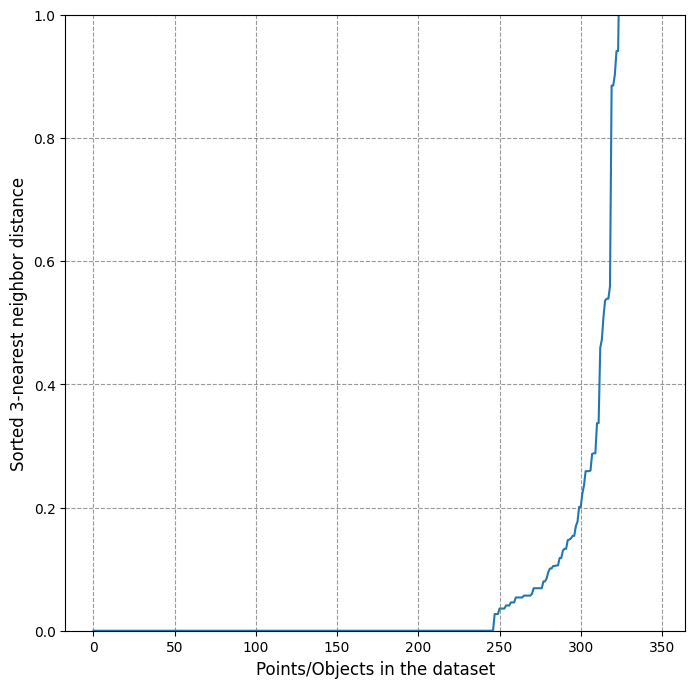

dat shape; col: 348  row: 2
348
[ 0  1  2  3  4  5  4  5  4  3  4  5  4  5  4  3  6  5  5  6  5  5  5  5
  5  5  5  5  5  5  5  0  7  5  0  5  5  5  5  8  5  5  8  5  5  8  5  5
  0  5  5  5  5  8  5  5  8  5  5  8  5  5  0  3  5  2  7  3  5  2  7  8
  5  5  5  5  5  5  5  5  5  5  5  5  0  5  5  5  5  5  5  5  5  4  4  4
  8  7  7  0  5  5  5  5  5  8  9  4  9  4  9  4  5  5  8  5  5  5  0  2
  5  2  5  5  5  5  5  5  5  5 11  5 10  5 10  8  5  4  8  8  4  5  5  5
  5  5  5  5  5 11  5 10  5 10  8  5  4  8  8  4  3  3  0  2  4  0  8  4
  4  4  0  5  5  5  8  0  2  0  5  5  5  5  5  4  5  4  5  5  5  8  5  7
  5  2  0  4  5  1  4  4  4  4  4  1  5  5  5  6  5  5  5  5  5  5  5  1
  5  4  8  8  5  4  8  8  4  0  4  8  8  5  4  8  8  4  3  3  0  2  4  8
  4  8  4  8  4  8  5  8  8  5  8  8  5  4  4  4  5  0  5  5  5  5  4  4
  4  8  5  5  3  0  3  3  0  5  0  2  8  2  8  2  8  2  8  0  4  4  5  8
  0 11  4  5  5  5  5  5  5  5  5  8  8  5  5  4  4  8  4  8  4  8  4  8
  5  9  5  2  5  2 

In [35]:
from sklearn.cluster import AffinityPropagation,MeanShift,DBSCAN,OPTICS,estimate_bandwidth
import numpy as np

data = np.array(data)

method = "AffinityPropagation"
method = "MeanShift"
method = "DBSCAN"
# method = "OPTICS"

if method == "AffinityPropagation":
  # TODO: シルエットスコアで調節した結果を評価するといいらしいとChatGPTが言ってた
  # preference
  # -200は細かいかなって感じ
  # -400がまあって感じ
  # -800はやりすぎかなって感じ
  # damping
  clustering_result = AffinityPropagation(
      random_state=5,
      preference=-1,
      damping=0.9
    ).fit_predict(data)
elif method == "MeanShift":
  bw = estimate_bandwidth(data, quantile=0.05, n_samples=500)
  print("bw",bw)
  clustering_result = MeanShift(
      bandwidth=bw
    ).fit_predict(data)
elif method == "DBSCAN":
  # init eps = 0.5, min samples=5
  import numpy as np
  from sklearn.neighbors import NearestNeighbors
  import matplotlib.pyplot as plt

  def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):
      nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

      # For each point, compute distances to its k-nearest neighbors
      distances, indices = nbrs.kneighbors(X) 

      distances = np.sort(distances, axis=0)
      distances = distances[:, k-1]

      # Plot the sorted K-nearest neighbor distance for each point in the dataset
      plt.figure(figsize=(8,8))
      plt.plot(distances)
      plt.xlabel('Points/Objects in the dataset', fontsize=12)
      plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
      plt.grid(True, linestyle="--", color='black', alpha=0.4)
      plt.ylim((0,1))
      plt.show()
      plt.close()

  k = 2 * len(data[0]) - 1 # k=2*{dim(dataset)} - 1
  get_kdist_plot(X=data, k=k)
  clustering_result = DBSCAN(eps=0.6, min_samples=3).fit_predict(data)
elif method == "OPTICS":
  clustering_result = OPTICS(
      min_samples=5,
      max_eps=np.inf,
      cluster_method="xi",
      xi=0.5,
    ).fit_predict(data)

clustering_result += 1

print("dat shape; col:", len(data)," row:", len(data[0]))
print(len(clustering_result))
print(clustering_result)
clustering_labels = set(clustering_result)
print(len(clustering_labels),clustering_labels)

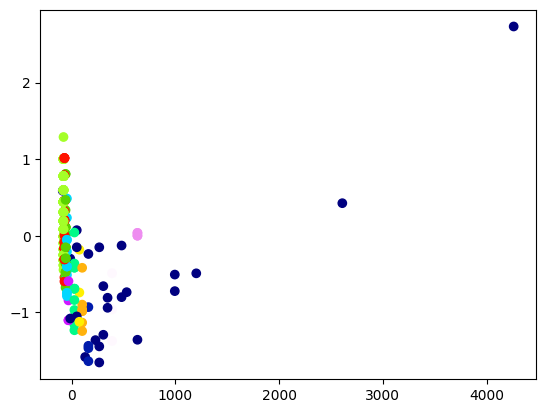

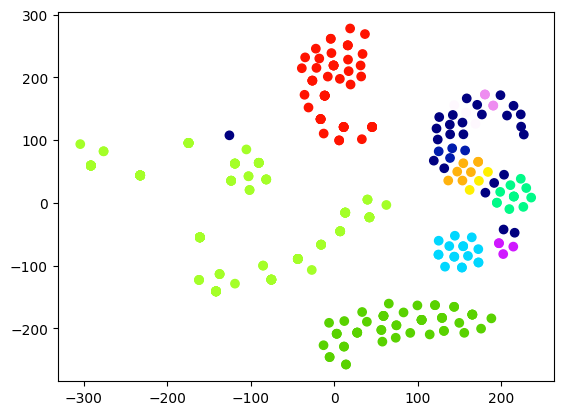

/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


array([[-12.697937 ,  -7.7348194],
       [  7.3218236,   3.8356562],
       [  6.6588387,  17.465576 ],
       [ 10.1638365,  -2.6661818],
       [  2.0147452, -13.685797 ],
       [ -2.5402267,  13.415567 ],
       [  3.2980452, -13.605951 ],
       [-13.627134 ,  -8.2326765],
       [  3.3815722, -13.608514 ],
       [  9.97132  ,  -2.8569562],
       [  3.3136957, -13.620647 ],
       [-16.152786 ,   6.9035745],
       [  3.3781328, -13.575173 ],
       [ -2.6442308,  13.369417 ],
       [  3.3841784, -13.521315 ],
       [ 10.159758 ,  -2.6513522],
       [  8.023406 ,  -1.7278938],
       [ -4.047874 ,  13.036968 ],
       [ -4.068985 ,  13.079552 ],
       [  8.069217 ,  -1.764094 ],
       [ 22.675203 ,   5.1203456],
       [ -3.9563422,  13.173384 ],
       [-15.906333 ,   7.2235365],
       [-12.763897 ,  -7.9119763],
       [ -4.120357 ,  12.985885 ],
       [ -4.036686 ,  13.076239 ],
       [-12.731749 ,  -7.758192 ],
       [ -4.0741315,  13.074595 ],
       [-13.631476 ,

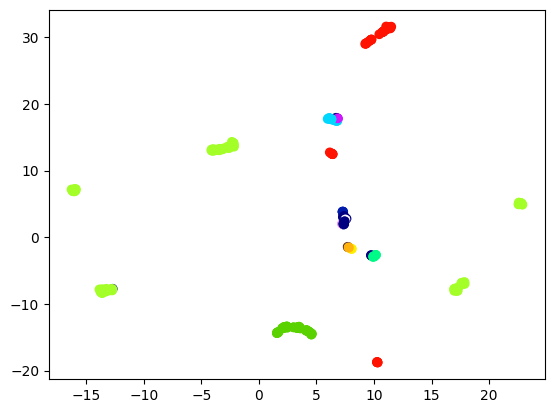

In [36]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os
import datetime

save_dir_name = "_vis-result"
dir_path = f"./data/{save_dir_name}/"
time_dir_path = dir_path + f"{str(datetime.date.today())}/"
try:
    os.mkdir(dir_path)
except FileExistsError:
    pass
try:
    os.mkdir(time_dir_path)
except FileExistsError:
    pass

data = np.array(data)
file_explain = f"{datetime.datetime.now().time()}_clustering_{method}"

from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
data_pca = pca.fit_transform(data)

plt.scatter(data_pca[:,0],data_pca[:,1], c=clustering_result, cmap="gist_ncar")
plt.savefig(time_dir_path + f"{file_explain}_plot-pca.png")
plt.show()

tsne = TSNE(n_components=2, random_state=0)
data_tsne = tsne.fit_transform(data)

plt.scatter(data_tsne[:,0],data_tsne[:,1], c=clustering_result, cmap="gist_ncar")
plt.savefig(time_dir_path + f"{file_explain}_plot-tsne.png")
plt.show()

from umap import UMAP

umap = UMAP(n_components=2, random_state=0)
data_umap = umap.fit_transform(data)
pprint(data_umap)

plt.scatter(data_umap[:,0],data_umap[:,1], c=clustering_result, cmap="gist_ncar")
plt.savefig(time_dir_path + f"{file_explain}_plot-umap.png")
plt.show()

In [12]:
import os
import datetime
from section_divide import get_section


notes_file_path = "./data/m155_notes-test.json"
sections = get_section(notes_file_path)

clustering_labels = set(clustering_result)

for label in clustering_labels:
    # ラベルが一致するデータのみをフィルタリング
    # plt.scatter(data_subset[:, 0], data_subset[:, 1], label=str(label))    

    data_range = clustering_result == label
    data_subset = data[data_range]
    section_subset = [s for s,d in zip(sections,data_range) if d]
    
    for i,section in enumerate(section_subset):
        xs = [item["x"] for item in section]
        ys = [item["y"] for item in section]

In [37]:
import json
from pprint import pprint
from section_divide import get_section

file_path = "./data/_feature_vector.json"


with open(file_path) as f:
  data = json.load(f)
data = np.array(data)
# cluster_labels = set(clustering_result)


# pprint(sections[1])
print(len(sections), len(clustering_result))
label_by_note_count:dict[int,set] = dict()
cnt_by_note_count:dict[int,int] = dict()

note_count_by_label:dict[int,set] = dict()

note4_sections =  list()
note4_sections_idx =  list()

for i,section in enumerate(sections):
  
  if label_by_note_count.get(len(section)) is not None:
    label_by_note_count[len(section)].add(clustering_result[i])
    cnt_by_note_count[len(section)] += 1
  else:
    label_by_note_count[len(section)] = set()
    cnt_by_note_count[len(section)] = 0
  
  if note_count_by_label.get(clustering_result[i]) is not None:
    note_count_by_label[clustering_result[i]].add(len(section))
  else:
    note_count_by_label[clustering_result[i]] = set()
    
  if len(section) == 4:
    note4_sections.append(section)
    note4_sections_idx.append(i)

print("=== ノーツ数が4である区間の数，ノーツ数が4である区間のラベルの数，そのラベル")
print(cnt_by_note_count[4], len(label_by_note_count[4]), label_by_note_count[4])
print("=====")

# print("=== 「ノーツ数が4であるラベル」に属する区間が持つノーツ数")
# for label in label_by_note_count[4]:
#   print(label,note_count_by_label[label])
# print("=====")

clustering_labels = set(clustering_result)
from collections import defaultdict
data_by_label = defaultdict(set)
for i in range(len(data)):
  data_by_label[clustering_result[i]].add(i)


notes_file_path = "./data/m155_notes-test.json"
sections = get_section(notes_file_path)

ns = defaultdict(list)
for l in label_by_note_count[4]:
  ids = data_by_label[l]
  for i in ids:
    ns[len(sections[i])].append(i)
    # if len(sections[i]) == 4:
    #   n4.append(i)

for k,v in ns.items():
  print(f"note count = {k}\tlength = {len(v)}")

# import matplotlib.pyplot as plt

# # print("===")
# for i,idx in enumerate(note4_sections_idx):
#   find = False
#   for j,jdx in enumerate(note4_sections_idx):
#     if clustering_result[idx] == clustering_result[jdx]:
#       continue
    
#     print(clustering_result[idx], clustering_result[jdx])
    
#     fig = plt.figure(figsize = (10,4), facecolor='lightblue')
#     ax1 = fig.add_subplot(1, 2, 1)
#     ax2 = fig.add_subplot(1, 2, 2)

    
#     xs = [item["x"] for item in note4_sections[i]]
#     ys = [item["y"] for item in note4_sections[i]]
#     miny = min(ys)
#     ys = [y-miny for y in ys]
#     ax1.scatter(xs,ys, color="b", label=clustering_result[note4_sections_idx[idx]])
#     ax1.set_xlim([-0.3,12.3])
#     # ax1.set_ylim(bottom=0)
    
#     xs = [item["x"] for item in note4_sections[j]]
#     ys = [item["y"] for item in note4_sections[j]]
#     miny = min(ys)
#     ys = [y-miny for y in ys]
#     ax2.scatter(xs,ys,color="r", label=clustering_result[note4_sections_idx[jdx]])
#     ax2.set_xlim([-0.3,12.3])

#     plt.show()
    
#     break
#   else:
#     continue
  
#   break


# pprint(note4_sections[0])
# print("&")
# pprint(note4_sections[1])
# print("=====")


348 348
=== ノーツ数が4である区間の数，ノーツ数が4である区間のラベルの数，そのラベル
158 1 {5}
=====
key=4	length=159


In [38]:
clustering_labels = set(clustering_result)
# print(len(clustering_labels),clustering_labels)


import os
import datetime

from section_divide import get_section


notes_file_path = "./data/m155_notes-test.json"
sections = get_section(notes_file_path)


base_dir = "./data/_vis-result"
time_dir_path = f"{base_dir}/{str(datetime.date.today())}"
cluster_labels_dir = f"{time_dir_path}/{str(datetime.datetime.now().time())}-cluster-labels"

try:
    os.mkdir(base_dir)
except FileExistsError:
    pass
try:
    os.mkdir(time_dir_path)
except FileExistsError:
    pass
try:
    os.mkdir(cluster_labels_dir)
except FileExistsError:
    pass

for label in clustering_labels:
    # ラベルが一致するデータのみをフィルタリング
    # plt.scatter(data_subset[:, 0], data_subset[:, 1], label=str(label))
    
    dir_path = f"{cluster_labels_dir}/label-{label}/"
    try:
        os.mkdir(dir_path)
    except FileExistsError:
        pass
    
    
    file_name = f"{str(datetime.datetime.now().time())}"
    print(file_name)
    
    data_range = clustering_result == label
    # print(data_range)
    data_subset = data[data_range]
    section_subset = [s for s,d in zip(sections,data_range) if d]
    
    for i,section in enumerate(section_subset):
        xs = [item["x"] for item in section]
        ys = [item["y"] for item in section]
        plt.scatter(xs,ys, color="b", label=label)
        plt.xlim([-0.3,12.3])
        plt.savefig(f"{dir_path}{i}_{file_name}.png")
        plt.close()

# plt.legend()
# plt.xlim(left=-5)
# plt.show()

21:40:07.503758
21:40:11.001828
21:40:11.466551
21:40:13.583360
21:40:15.231606
21:40:22.713852
21:40:43.252066
21:40:43.640829
21:40:44.556050
21:40:52.053267
21:40:52.576290
21:40:53.115926
